In [6]:
import pandas as pd

# Read the file with the specified encoding
df = pd.read_csv("/home/jovyan/ML_assignment4/SeoulBikeData 2.csv", encoding="ISO-8859-1")

print(df.columns)

df.head()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Epoch 1/30
176/176 [==============================] - 1s 2ms/step - loss: 874723.6875 - val_loss: 707802.0000
Epoch 2/30
176/176 [==============================] - 0s 2ms/step - loss: 405478.9375 - val_loss: 146476.1250
Epoch 3/30
176/176 [==============================] - 0s 2ms/step - loss: 100490.9844 - val_loss: 72576.8281
Epoch 4/30
176/176 [==============================] - 0s 2ms/step - loss: 53871.4102 - val_loss: 41474.3711
Epoch 5/30
176/176 [==============================] - 0s 2ms/step - loss: 30437.3574 - val_loss: 23361.0059
Epoch 6/30
176/176 [==============================] - 0s 2ms/step - loss: 17026.5352 - val_loss: 13283.0898
Epoch 7/30
176/176 [==============================] - 0s 2ms/step - loss: 10081.2939 - val_loss: 8382.4785
Epoch 8/30
176/176 [==============================] - 0s 2ms/step - loss: 6717.6797 - val_loss: 6026.1924
Epoch 9/30
176/176 [==============================] - 0s 2ms/step - loss: 5080.1875 - val_loss: 4853.7773
Epoch 10/30
176/176 [=======

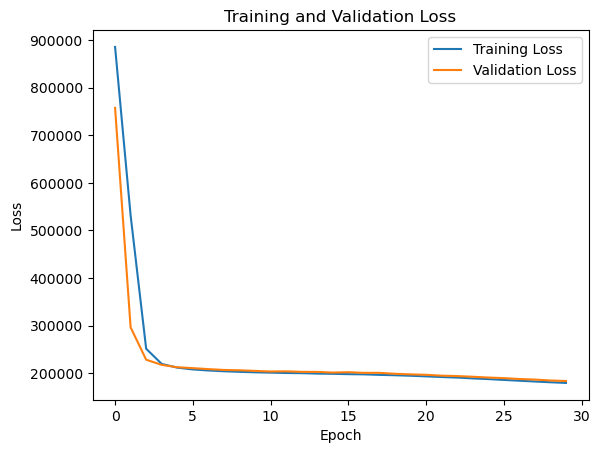

55/55 [==============================] - 0s 873us/step
Mean Squared Error (MSE): 95.48963629954116
Root Mean Squared Error (RMSE): 9.771879875415024


In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Load dataset
data = pd.read_csv("/home/jovyan/ML_assignment4/SeoulBikeData 2.csv", encoding="ISO-8859-1")

# Specify the desired size of the subset
subset_size = 100  # Adjust this based on your requirements

# Randomly sample subset_size number of rows from the dataset
subset = data.sample(n=subset_size, random_state=42)  # Use a fixed random state for reproducibility

# Drop non-numeric columns and target column
X = data.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
y = data['Rented Bike Count']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # No activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model on the testing data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Get predictions on the test set
y_pred = model.predict(X_test)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = np.mean(np.square(predictions.flatten() - y_test))
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


